## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [46]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [47]:
# Read the mouse data and the study results
mouse_metadataDF = pd.read_csv("data/Mouse_metadata.csv")
mouse_metadataDF.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [48]:
study_resultsDF = pd.read_csv("data/Study_results.csv")
study_resultsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [49]:
# Combine the data into a single dataset
mouse_metadata_complete = pd.merge(mouse_metadataDF, study_resultsDF,on=["Mouse ID"])
mouse_metadata_complete


# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice.
number_of_mice=len(list(set(mouse_metadata_complete["Mouse ID"].values)))
number_of_mice

249

In [51]:
# Checking the number of mice.
number_of_mice = mouse_metadata_complete.groupby("Mouse ID")["Mouse ID"].unique().count()
number_of_mice

249

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
temp_df = mouse_metadata_complete.groupby(["Mouse ID","Timepoint"]).size().reset_index(name="total")
dup_mice_df=temp_df[temp_df["total"]>1]
dup_mice_df

,Mouse ID,Timepoint,total
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_metadata_complete[mouse_metadata_complete["Mouse ID"]=="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_metadata_complete=mouse_metadata_complete[mouse_metadata_complete["Mouse ID"]!="g989"]
mouse_metadata_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice in the clean DataFrame.
number_of_mice=len(list(set(mouse_metadata_complete["Mouse ID"].values)))
number_of_mice

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg1=mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
agg2=mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
agg3=mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
agg4=mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
agg5=mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df=pd.DataFrame()
summary_df=summary_df.append(agg1,ignore_index=True)
summary_df=summary_df.append(agg2,ignore_index=True)
summary_df=summary_df.append(agg3,ignore_index=True)
summary_df=summary_df.append(agg4,ignore_index=True)
summary_df=summary_df.append(agg5,ignore_index=True)
summary_df
#summary_df=summary_df.append({"group":["mean","median","variance","standard deviation","sem"]},ignore_index=True)
summary_df
summary_df
summary_df.insert(loc=0,column="group",value=["mean","median","variance","standard deviation","sem"])
summary_df
summary_df=summary_df.set_index("group",drop=True)
summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
group,,,,,,,,,,
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
standard deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
sem,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
df = pd.DataFrame()
grouped = mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"]
df['mean'] = grouped.mean()
df['median'] = grouped.median()
df['var'] = grouped.var()
df['std'] = grouped.std()
df['sem'] = grouped.sem()
df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

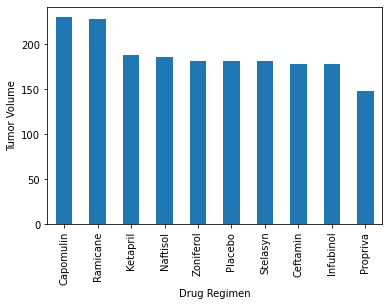

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = mouse_metadata_complete["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

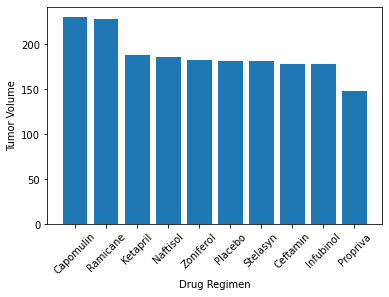

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index.values,counts.values)
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.show


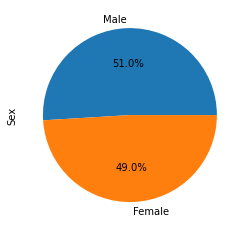

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = mouse_metadata_complete["Sex"].value_counts()
counts
counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

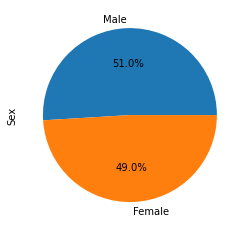

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [81]:
# Start by getting the last (greatest) timepoint for each mouse
finalTumorVolume=mouse_metadata_complete.groupby("Mouse ID")["Timepoint"].max()
finalTumorVolume=finalTumorVolume.reset_index()
finalTumorVolume.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cleanMergedDF = finalTumorVolume.merge(mouse_metadata_complete, on=["Mouse ID", "Timepoint"], how="left")
cleanMergedDF.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [82]:
print(cleanMergedDF["Drug Regimen"].unique())


['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [83]:
# Put treatments into a list for for loop (and later for plot labels)

DrugRegimenList = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ramicane',
 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']
# Create empty list to fill with tumor vol data (for plotting)
tumorvolumeList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in DrugRegimenList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVolumeCount = cleanMergedDF.loc[cleanMergedDF["Drug Regimen"]==d, "Tumor Volume (mm3)" ]
    
    # add subset 
    tumorvolumeList.append(finalTumorVolumeCount)
    
    # Determine outliers using upper and lower bounds
    quartiles = finalTumorVolumeCount.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = finalTumorVolumeCount.loc[(finalTumorVolumeCount < lowerbound) | (finalTumorVolumeCount > upperbound)]
    print(f"{d}'s pontential outliers: \n{outliers}\n")

Infubinol's pontential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Placebo's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Stelasyn's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Zoniferol's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ketapril's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Propriva's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Naftisol's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Capomulin's pontential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)



In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [98]:
# generate a table of all mice filtered out by the Capomulin
capomulinTable = mouse_metadata_complete.loc[mouse_metadata_complete["Drug Regimen"]=="Capomulin"]
capomulinTable.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


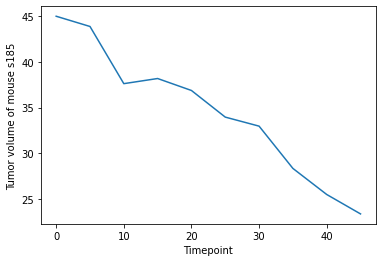

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# pick a mouse treated with capomulin

mouseData = capomulinTable.loc[capomulinTable["Mouse ID"]=="s185"]
plt.plot(mouseData["Timepoint"], mouseData["Tumor Volume (mm3)"])
plt.xlabel('Timepoint')
plt.ylabel("Tumor volume of mouse s185")
plt.show()

In [102]:
CapomulinAverage = capomulinTable.groupby("Mouse ID").mean()
CapomulinAverage.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


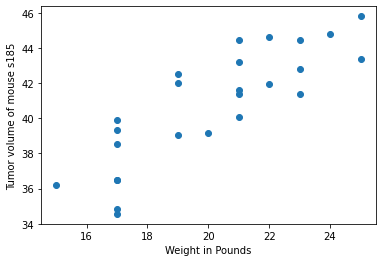

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel('Weight in Pounds')
plt.ylabel("Tumor volume of mouse s185")
plt.show()

## Correlation and Regression

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for capomulin

correlation = round(st.pearsonr(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# model # gets the y =mx + b
#index 0 is the slope
#index 1 is the y intercept

model = st.linregress(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
print(model)

yvalues = CapomulinAverage["Weight (g)"] * model[0] + model[1]




The correlation between mouse weight and the average tumor volume is 0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)


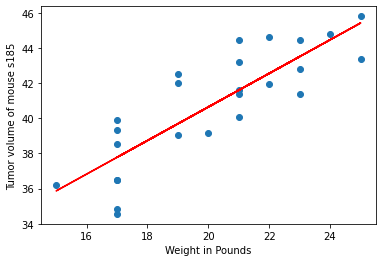

In [122]:
# create scatter graph again
plt.scatter(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel('Weight in Pounds')
plt.ylabel("Tumor volume of mouse s185")
plt.plot(CapomulinAverage["Weight (g)"], yvalues, color="red")
plt.show()



